In [0]:
import pandas as pd
import json


In [2]:
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
  
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:


f2 = open("20_train","r")  
lines = f2.readlines()#读取全部内容 

print(lines)

labellist=[]
textlist=[]
hash_count = []
hash_content=[]
at_count=[]
at_content=[]

for i in lines:
    line=i.strip().split('\t')
    labellist.append(line[1])
    textlist.append(line[0])
    
    myline = line[0].replace('@ user ','')
    myline = myline.replace('@user ','')

    hashlist = myline.split("#")


    hash_count.append(len(hashlist)-1)
    content = []
    for item in hashlist:
      mylist = item.split(" ")
      content.append(mylist[0])
    if len(hashlist)==1:
      hash_content.append('')
    else:
      hash_content.append(content[1:])


    atlist = myline.split("@")
    at_count.append(len(atlist)-1)

    

    if len(atlist)==1:
      at_content.append('')
    else:
      at_content.append(atlist[-1])

f2.close()

print(textlist)
print(labellist)

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None # for easy if-statement 

def cleantext(text):
    delEStr = string.digits ##删除数字
    identify = str.maketrans('', '',delEStr)  
    text = text.translate(identify) 
    words=[]
    words=nltk.word_tokenize(text)
    words=[w.lower() for w in words if w.isalpha()] ##转成小写 删除奇怪的标点符号

    stop = stopwords.words('english') + list(string.punctuation) ##删除stopword和标点符号
    all_words=[i for i in words if i not in stop and len(i)>1]

    all_words_pos=nltk.pos_tag(all_words)
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(0,len(all_words_pos),1):
        wntag=get_wordnet_pos(all_words_pos[i][1])
        if wntag is None:# not supply tag in case of None
            all_words[i]=wordnet_lemmatizer.lemmatize(all_words[i])
        else:
            all_words[i]=wordnet_lemmatizer.lemmatize(all_words[i],pos=wntag)

    str2 = ' '
    finalstring=str2.join(all_words)

    return finalstring


#print(cleantext("it's the perfect day to sit in one of our hand painted chairs #perfect #day #tryanewteatuesda"))

tweetlist=[]

count=0
for tweet in textlist:
    count+=1
    tweetlist.append(cleantext(tweet))

print(tweetlist)
columns = ['text','label','hashcount','hashcontent','atcount','atcontent']
dataframe=pd.DataFrame({'text':tweetlist,'label':labellist,'hashcount':hash_count,'hashcontent':hash_content,'atcount':at_count,'atcontent':at_content})
display(dataframe)

# dataframe.to_csv("validation_20.csv",index=False,sep=",",columns=columns)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,text,label,hashcount,hashcontent,atcount,atcontent
0,yl lake champion young life camp,eoji2744,1,[yl],1,lake champion - a young life camp
1,family town ridgefield,eoji2764,0,,1,town of ridgefield
2,want get new york new york,eoji1f60e,0,,1,"new york , new york"
3,want hair cut make happen shorthair ebdastylis...,eoji1f64c,2,"[shorthair, ebdastylist]",1,versastyles hair
4,deliver call open newhaven hotdogsandmac jorda...,eoji1f525,3,"[open, newhaven, hotdogsandmac]",1,jordan's hot dogs and mac
...,...,...,...,...,...,...
580266,love livin life anna laura take,eoji1f495,0,,0,
580267,vitani thank much awesome anniversary gift bes...,eoji2764,1,[bestmartiniever],0,
580268,really shitty mood bf make thing well,eoji2764,0,,0,
580269,new favorite place eat maxwell street chicago ...,eoji1f60d,0,,1,maxwell street chicago eatery


In [4]:
dataframe.groupby(["label"]).size()
print(dataframe.groupby(["label"]).size())

label
eoji1f384    18457
eoji1f389    10736
eoji1f44c    16760
eoji1f48b    13950
eoji1f495    27513
eoji1f499    17214
eoji1f4aa    14886
eoji1f4af    20584
eoji1f525    28120
eoji1f602    88477
eoji1f60a    33282
eoji1f60d    58080
eoji1f60e    22114
eoji1f618    20512
eoji1f62d    15647
eoji1f64c    21151
eoji1f64f    15867
eoji2728     18325
eoji2744     19376
eoji2764     99220
dtype: int64


In [5]:
dataframe.label[dataframe.label== 'eoji1f4af'] = 5 
dataframe.label[dataframe.label== 'eoji1f525'] = 4
dataframe.label[dataframe.label== 'eoji1f602'] = 1
dataframe.label[dataframe.label== 'eoji1f60d'] = 2
dataframe.label[dataframe.label== 'eoji2764'] = 3

dataframe.label[dataframe.label== 'eoji1f4aa'] = 6
dataframe.label[dataframe.label== 'eoji1f495'] = 7
dataframe.label[dataframe.label== 'eoji1f60e'] = 8
dataframe.label[dataframe.label== 'eoji1f62d'] = 9
dataframe.label[dataframe.label== 'eoji1f499'] = 10

dataframe.label[dataframe.label== 'eoji1f618'] = 11 
dataframe.label[dataframe.label== 'eoji1f60a'] = 12
dataframe.label[dataframe.label== 'eoji1f64f'] = 13
dataframe.label[dataframe.label== 'eoji1f389'] = 14
dataframe.label[dataframe.label== 'eoji1f44c'] = 15

dataframe.label[dataframe.label== 'eoji1f64c'] = 16
dataframe.label[dataframe.label== 'eoji2744'] = 17
dataframe.label[dataframe.label== 'eoji1f48b'] = 18
dataframe.label[dataframe.label== 'eoji2728'] = 19
dataframe.label[dataframe.label== 'eoji1f384'] = 20

display(dataframe)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

,text,label,hashcount,hashcontent,atcount,atcontent
0,yl lake champion young life camp,17,1,[yl],1,lake champion - a young life camp
1,family town ridgefield,3,0,,1,town of ridgefield
2,want get new york new york,8,0,,1,"new york , new york"
3,want hair cut make happen shorthair ebdastylis...,16,2,"[shorthair, ebdastylist]",1,versastyles hair
4,deliver call open newhaven hotdogsandmac jorda...,4,3,"[open, newhaven, hotdogsandmac]",1,jordan's hot dogs and mac
...,...,...,...,...,...,...
580266,love livin life anna laura take,7,0,,0,
580267,vitani thank much awesome anniversary gift bes...,3,1,[bestmartiniever],0,
580268,really shitty mood bf make thing well,3,0,,0,
580269,new favorite place eat maxwell street chicago ...,2,0,,1,maxwell street chicago eatery


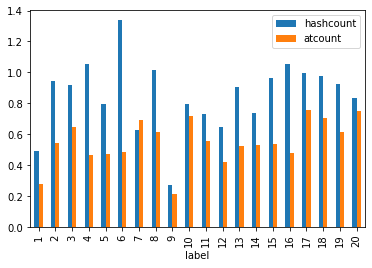

In [6]:
df=dataframe.groupby(["label"]).mean()
df.plot.bar()

In [0]:
dataframe.to_csv("train_20_now.csv",index=False,sep=",",columns=columns)